<a href="https://colab.research.google.com/github/KacperGrodecki/nieruchomosci-mazowieckie/blob/0.0.4/mazowieckie_colab_rysunki_mieszkania_i_analiza_wczytanie_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import numpy as np
np.random.seed(7)
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
#from otoDomScraper import daneDomu
#from random import randrange
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from IPython.display import Javascript
import requests
from collections import OrderedDict
import seaborn as sns
from sklearn import preprocessing
import cufflinks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [346]:
pip install plotly==4.14.3

In [347]:
pip install chart-studio

In [348]:
pip install cufflinks plotly

In [349]:
from plotly.offline import iplot, init_notebook_mode

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly import tools

In [350]:
filename='/content/drive/My Drive/domymazowieckie/dfMieszkania_analysis_final.csv'

In [351]:
final=pd.read_csv(filename,index_col=0)

In [352]:
final.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,NaN,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,NaN,NaN,NaN,pierwotny,44.44,NaN,0,11300.000000,3,NaN,NaN
2,4,apartamentowiec,pustak,do zamieszkania,drewniane,wtórny,146.00,NaN,2004,24657.554795,4,21.016944,52.200000
3,4,NaN,NaN,NaN,NaN,pierwotny,91.00,NaN,2021,13571.439560,0,20.957222,52.233333
4,2,NaN,NaN,do zamieszkania,NaN,wtórny,38.00,NaN,1977,12763.157895,12,20.933889,52.288889


czyszczenie danych

In [353]:
final=final.drop(['powierzchniaDzialki_corr'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



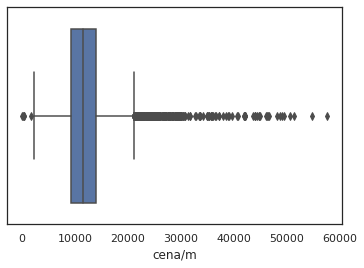

In [354]:
sns.boxplot(final[final['cena/m']<60000]['cena/m'])

In [355]:
final_plots=final[final['cena/m']<60000].copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



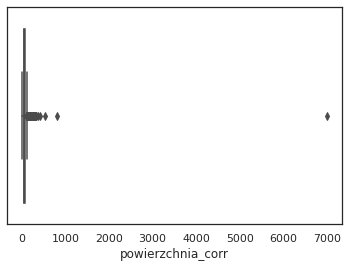

In [356]:
sns.boxplot(final_plots['powierzchnia_corr'])

In [357]:
final_plots=final_plots[final_plots['powierzchnia_corr']<1000]

In [358]:
final_plots['materialBudynku'].unique()

array(['inne', nan, 'pustak', 'wielka płyta', 'cegła', 'żelbet', 'beton',
       'beton komórkowy', 'silikat', 'keramzyt', 'drewno'], dtype=object)

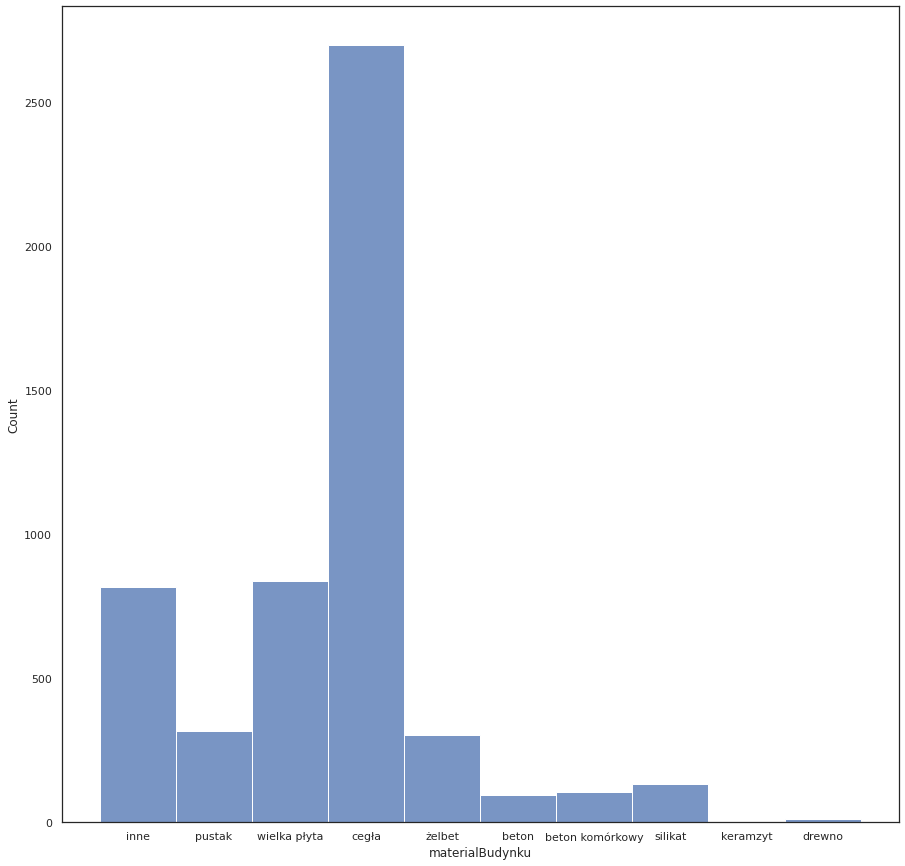

In [359]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="materialBudynku")

In [360]:
final_plots=final_plots[(final_plots['materialBudynku']!='keramzyt')]
final_plots=final_plots[(final_plots['materialBudynku']!='keramzyt') ]

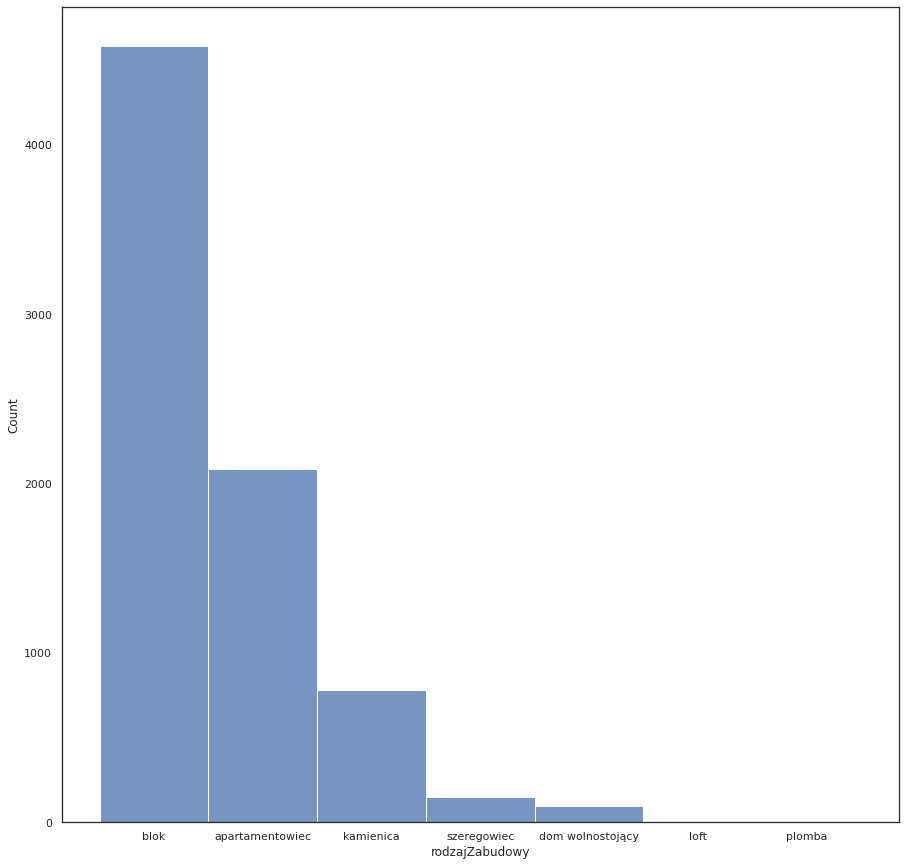

In [361]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="rodzajZabudowy")

In [362]:
final_plots=final_plots[(final_plots['rodzajZabudowy']!='loft')]
final_plots=final_plots[(final_plots['rodzajZabudowy']!='plomba')]

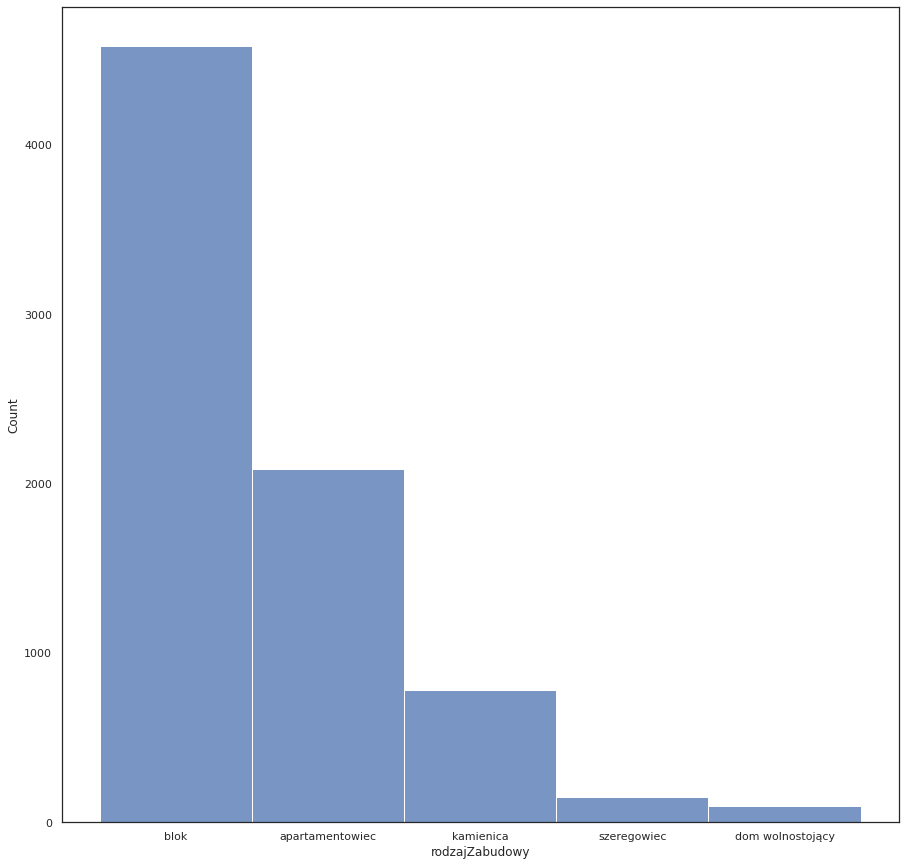

In [363]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="rodzajZabudowy")

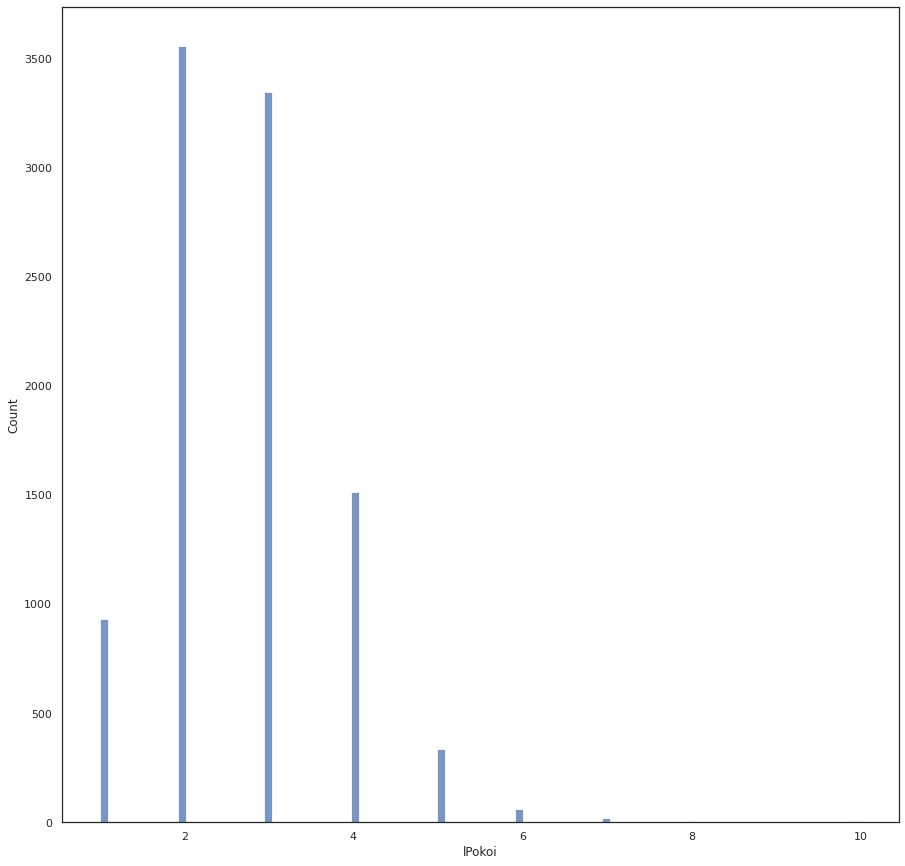

In [364]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="lPokoi")

In [365]:
final_plots.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,NaN,NaN,NaN,pierwotny,44.44,0,11300.000000,3,NaN,NaN
2,4,apartamentowiec,pustak,do zamieszkania,drewniane,wtórny,146.00,2004,24657.554795,4,21.016944,52.200000
3,4,NaN,NaN,NaN,NaN,pierwotny,91.00,2021,13571.439560,0,20.957222,52.233333
4,2,NaN,NaN,do zamieszkania,NaN,wtórny,38.00,1977,12763.157895,12,20.933889,52.288889


fillna

In [366]:
final_plots['materialBudynku']=final_plots['materialBudynku'].fillna('brak info')
final_plots['rodzajZabudowy']=final_plots['rodzajZabudowy'].fillna('brak info')
final_plots['stanWykonczenia']=final_plots['stanWykonczenia'].fillna('brak info')
final_plots['okna']=final_plots['okna'].fillna('brak info')

final_plots['locationX'].fillna(final_plots['locationX'].mean(),inplace=True)
final_plots['locationY'].fillna(final_plots['locationY'].mean(),inplace=True)

In [367]:
final_plots.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,brak info,brak info,brak info,pierwotny,44.44,0,11300.000000,3,21.005483,52.214362
2,4,apartamentowiec,pustak,do zamieszkania,drewniane,wtórny,146.00,2004,24657.554795,4,21.016944,52.200000
3,4,brak info,brak info,brak info,brak info,pierwotny,91.00,2021,13571.439560,0,20.957222,52.233333
4,2,brak info,brak info,do zamieszkania,brak info,wtórny,38.00,1977,12763.157895,12,20.933889,52.288889


In [368]:
final_plots.isna().sum()

lPokoi               0
rodzajZabudowy       0
materialBudynku      0
stanWykonczenia      0
okna                 0
rynek                0
powierzchnia_corr    0
rokBudowy_corr       0
cena/m               0
lPieter_crr          0
locationX            0
locationY            0
dtype: int64

pierwotny tylko po 2010 roku

In [385]:
final_plots.loc[(final_plots['rokBudowy_corr']>0)&(final_plots['rokBudowy_corr']<2010),'rynek']='wtórny'

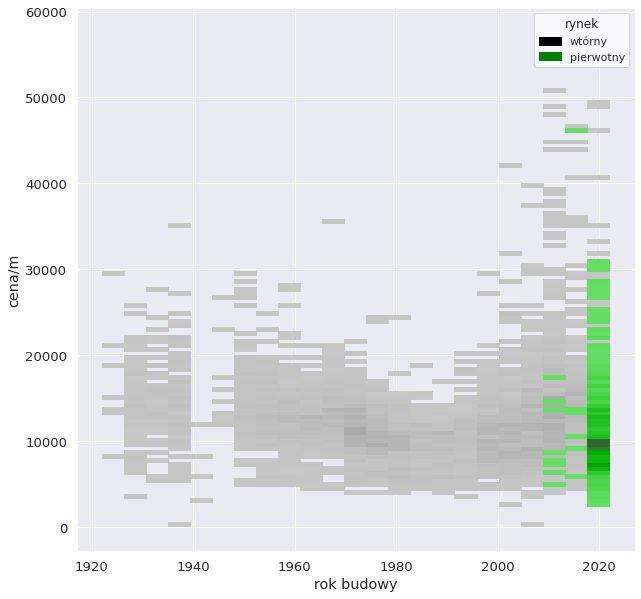

In [386]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.set(font_scale = 1)
ax=sns.set_style("white")
ax=sns.histplot(x="rokBudowy_corr", y="cena/m", hue ='rynek', data=final_plots[(final_plots['rokBudowy_corr']>1920)&(final_plots['rokBudowy_corr']<2023)],palette=['black','green'])
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

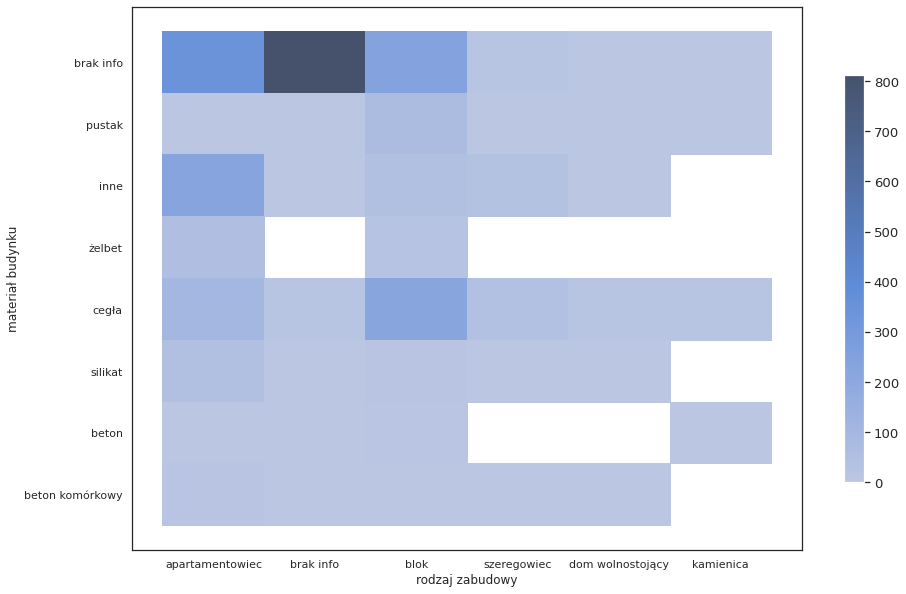

In [384]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.2)
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='pierwotny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

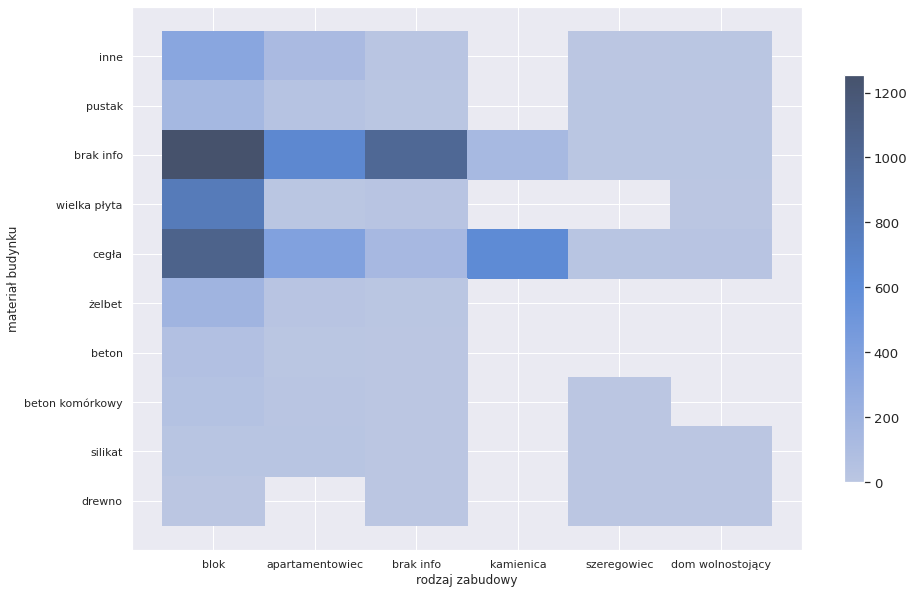

In [426]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.2)
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='wtórny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

kamienica jest tylko z cegły

In [427]:
final_plots=final_plots[final_plots['materialBudynku']!='drewno']

In [428]:
final_plots.loc[(final_plots['rodzajZabudowy']=='kamienica')&(final_plots['materialBudynku']!='cegła'),'materialBudynku']='brak info'

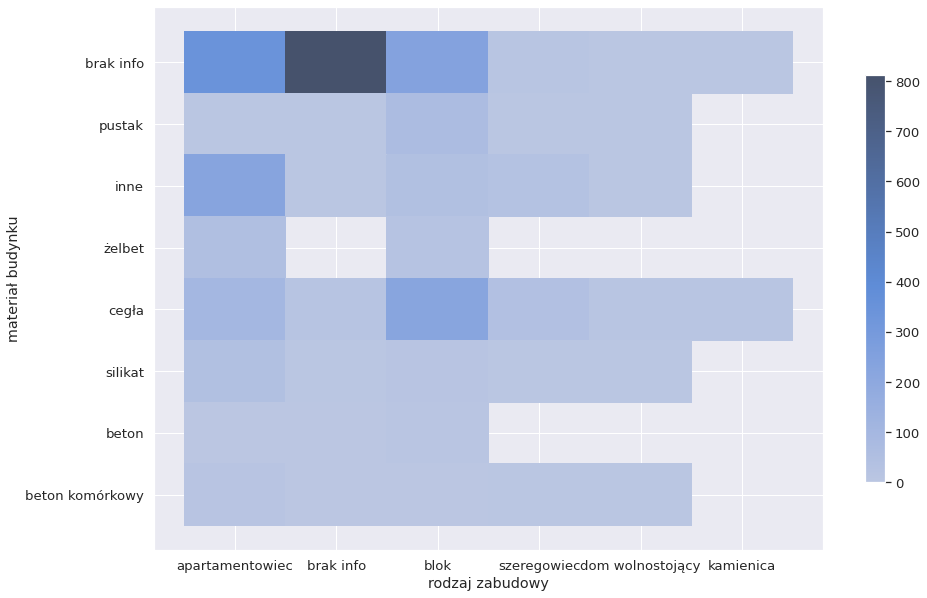

In [429]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.2)
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='pierwotny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

dane oczyszczone###############################################################################

########################################

###############################

#######################################

In [389]:
dummies = pd.get_dummies(final_plots, columns=['rodzajZabudowy', 'materialBudynku', 'stanWykonczenia', 'okna', 'rynek'])

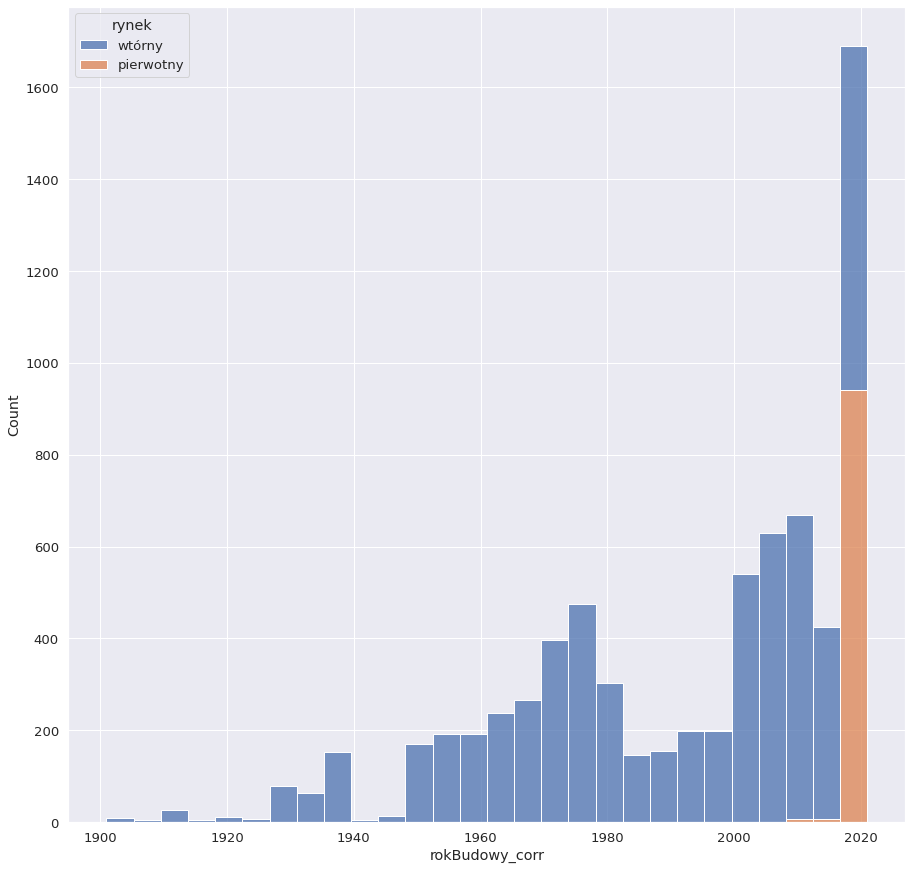

In [395]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['rokBudowy_corr']>1900)&(final_plots['rokBudowy_corr']<2022)], x="rokBudowy_corr",hue='rynek',multiple="stack")

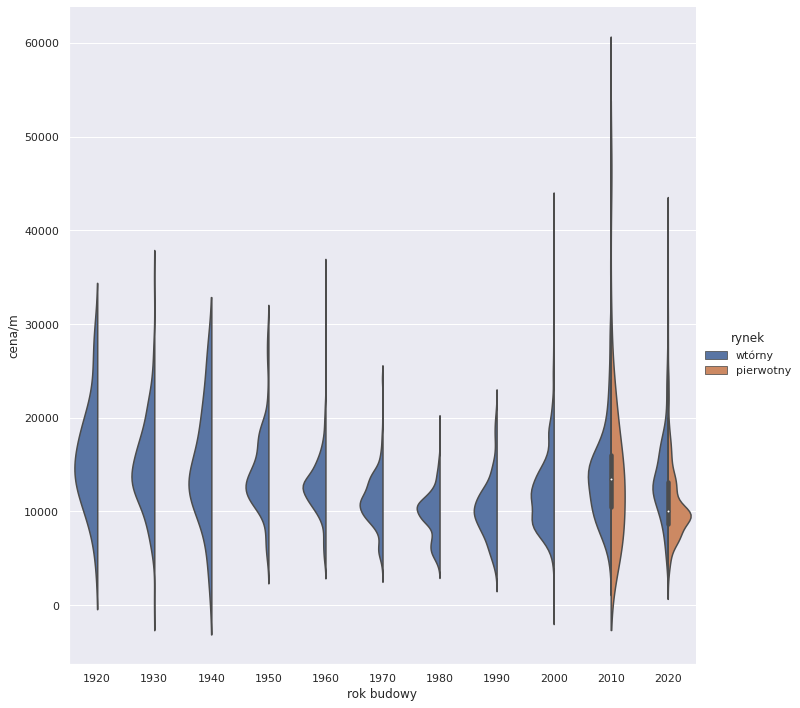

In [446]:
sns.set(font_scale = 1)
ax=sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="violin", data=final_plots[final_plots['rokBudowy_cat']>1910],height=10,split=True)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

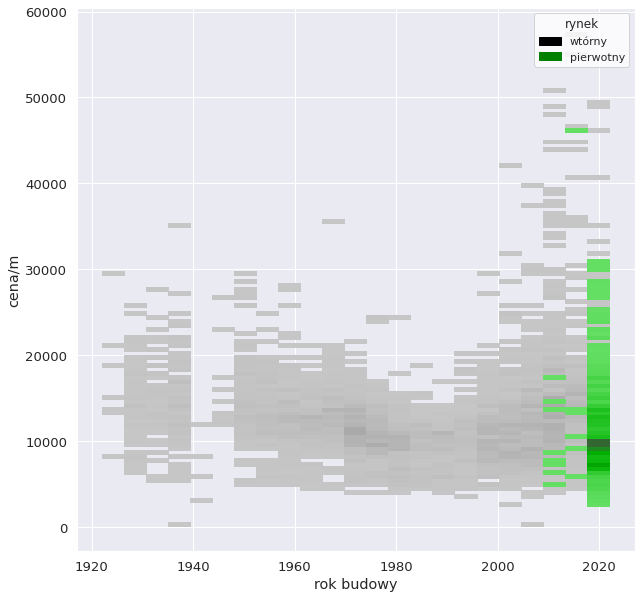

In [443]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.set(font_scale = 1)
ax=sns.set_style("white")
ax=sns.histplot(x="rokBudowy_corr", y="cena/m", hue ='rynek', data=final_plots[(final_plots['rokBudowy_corr']>1920)&(final_plots['rokBudowy_corr']<2023)],palette=['black','green'])
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

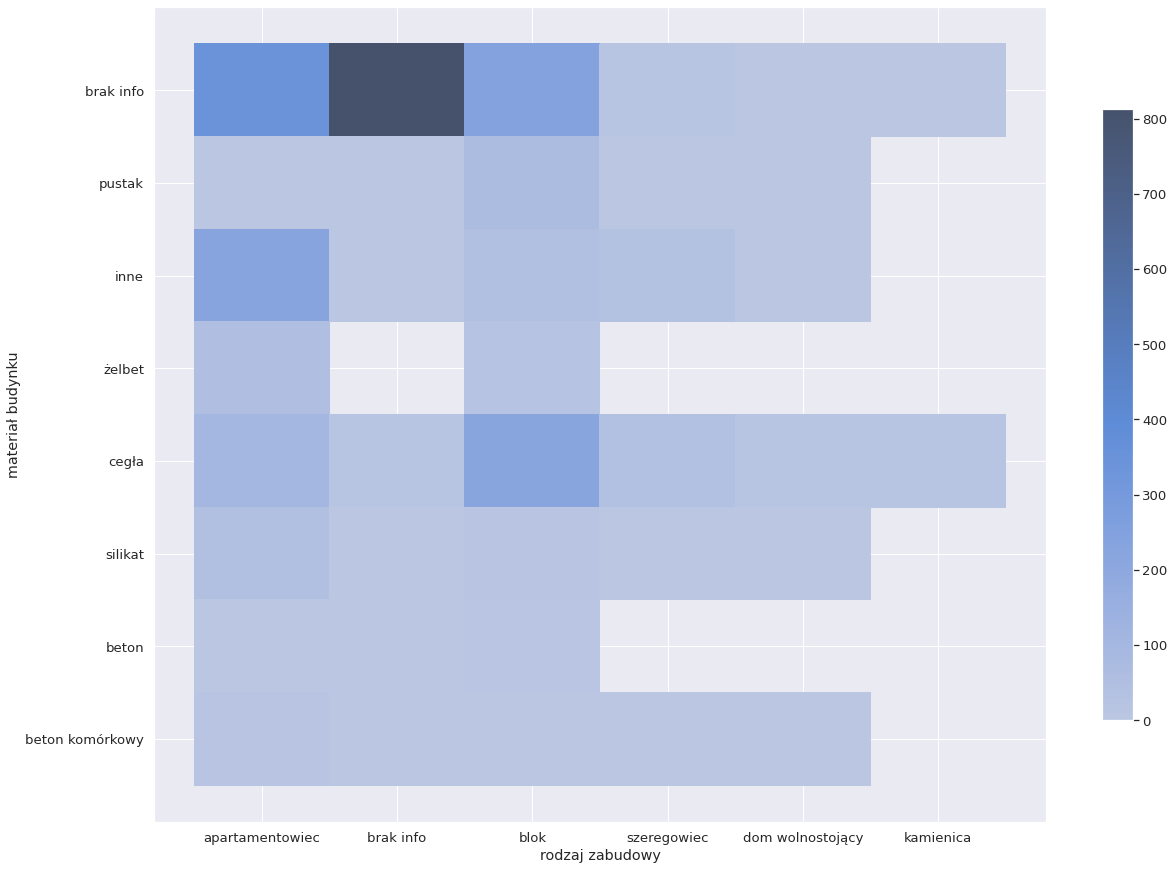

In [393]:
fig, ax = plt.subplots(figsize=(20,15))
sns.set(font_scale = 1.2)
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='pierwotny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

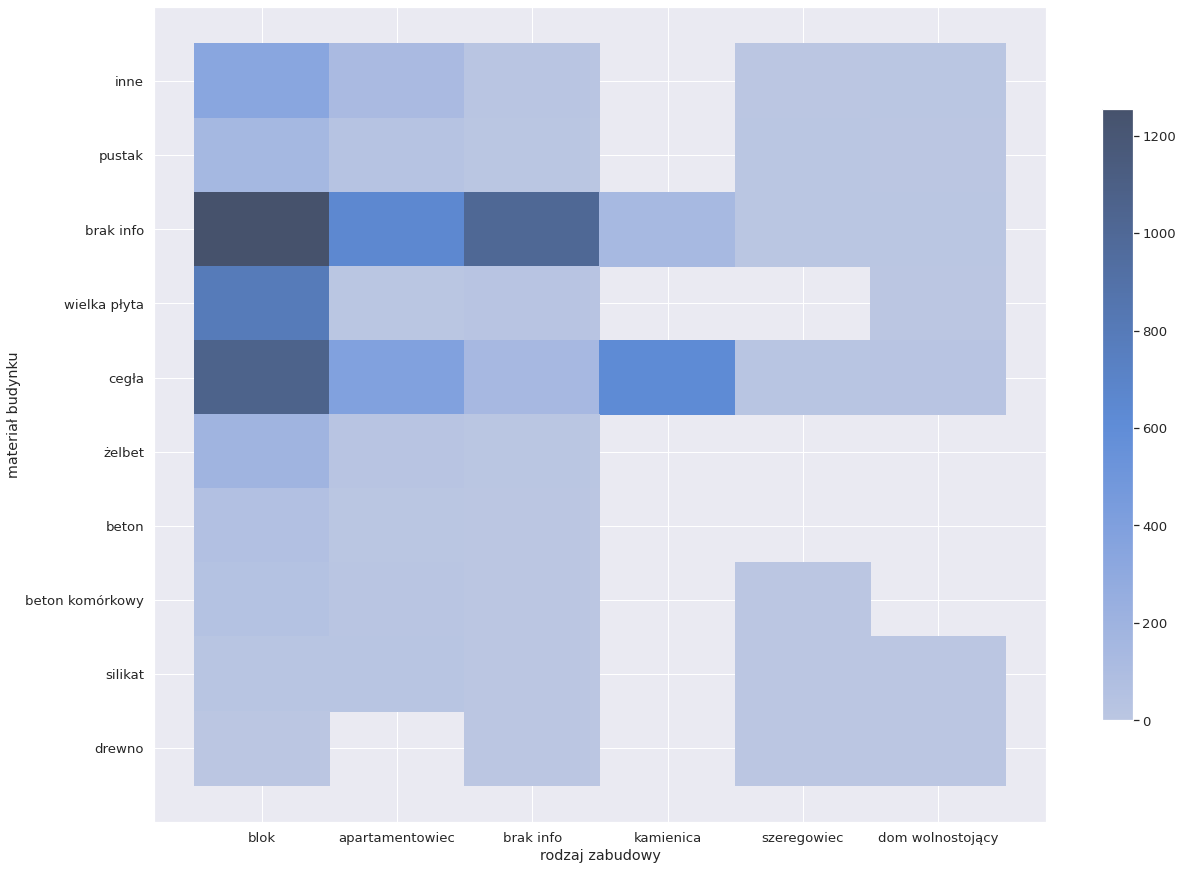

In [392]:
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='wtórny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [444]:
final_plots['powierzchnia_cat']=(final_plots['powierzchnia_corr']/50).astype(int)*50
final_plots['rokBudowy_cat']=(final_plots['rokBudowy_corr1']/10).astype(int)*10
final_plots['locationX_cat']=(final_plots['locationX']).astype(int)
final_plots['locationY_cat']=(final_plots['locationY']).astype(int)

[Text(0, 0.5, 'liczba'), Text(0.5, 0, 'rok budowy')]

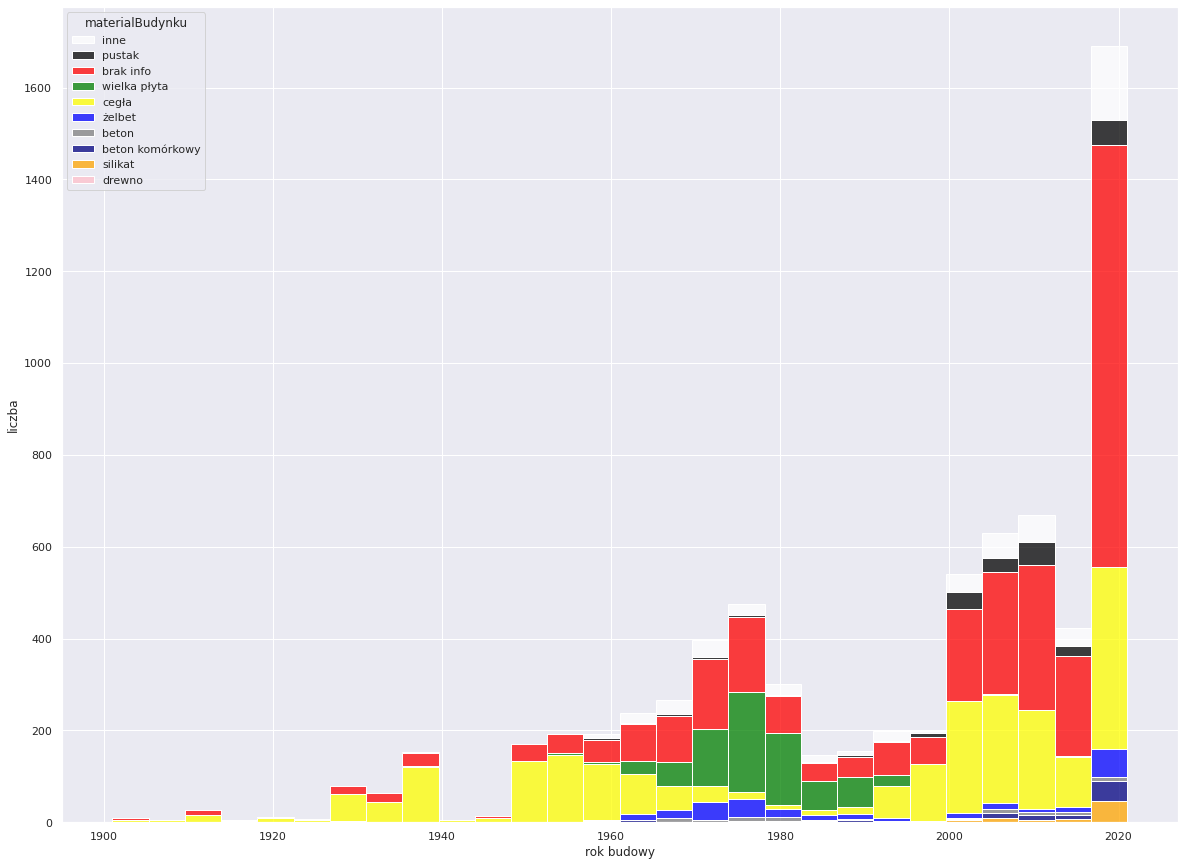

In [413]:
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.histplot(data=final_plots[(final_plots['rokBudowy_corr']>1900)&(final_plots['rokBudowy_corr']<2022)], x="rokBudowy_corr",hue='materialBudynku',multiple="stack",
                palette=['white','black','red','green','yellow','blue','gray','navy','orange','pink'])
ax.set(xlabel='rok budowy', ylabel='liczba')

[Text(0, 0.5, 'liczba'), Text(0.5, 0, 'rok budowy')]

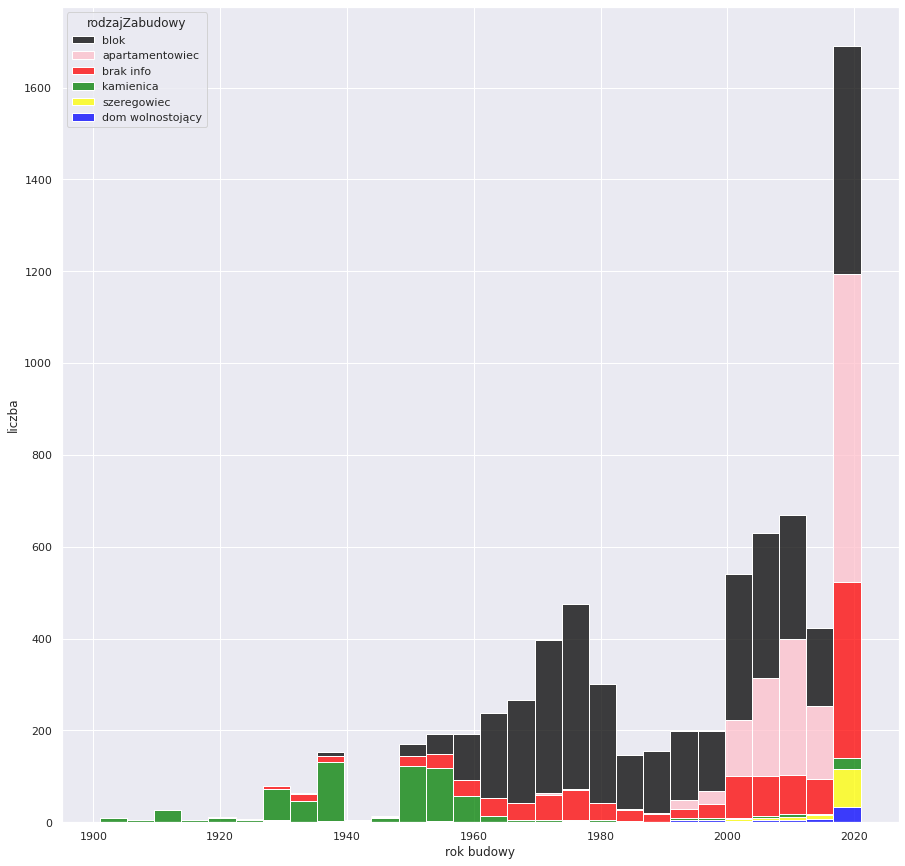

In [418]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['rokBudowy_corr']>1900)&(final_plots['rokBudowy_corr']<2022)], x="rokBudowy_corr",hue='rodzajZabudowy',palette=['black','pink','red','green','yellow','blue'],multiple="stack")
ax.set(xlabel='rok budowy', ylabel='liczba')

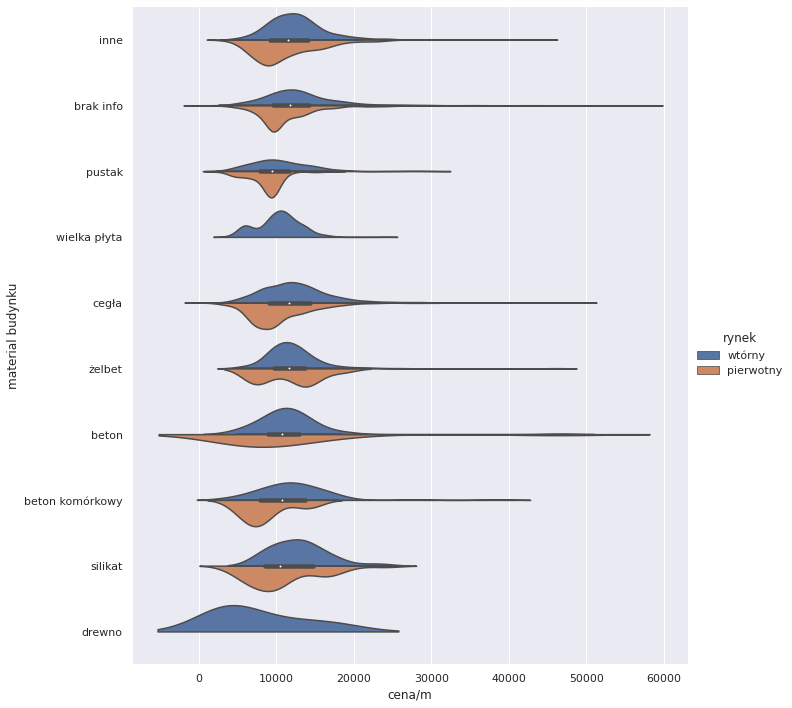

In [423]:
ax=sns.catplot(y="materialBudynku", x="cena/m", kind="violin", data=final_plots[final_plots['materialBudynku']!='0'],height=10,hue='rynek',split=True)#hue="kmean"
ax.set(ylabel='material budynku', xlabel='cena/m')
plt.show()

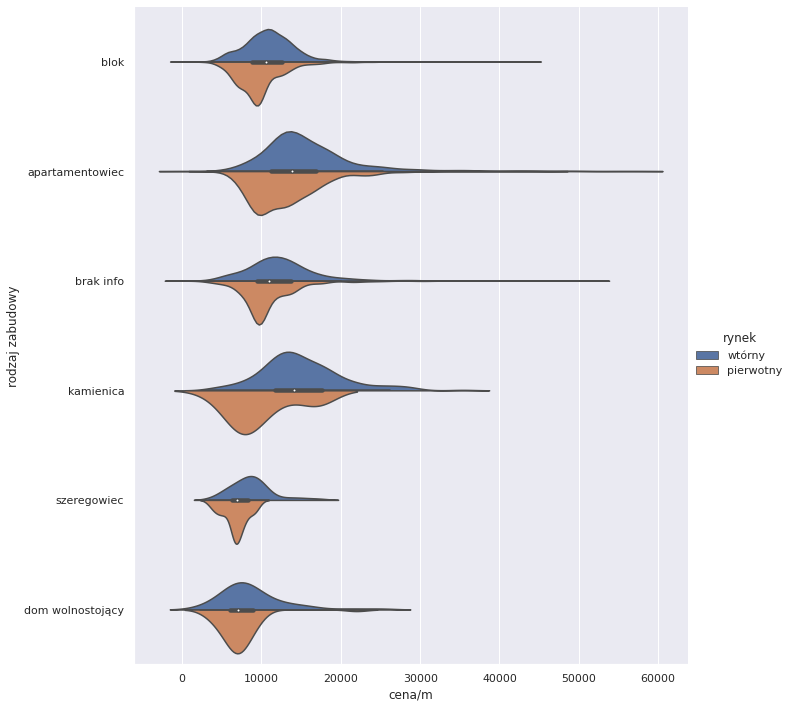

In [424]:
ax=sns.catplot(y="rodzajZabudowy", x="cena/m",  kind="violin", data=final_plots[final_plots['rodzajZabudowy']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='rodzaj zabudowy', xlabel='cena/m')
plt.show()

In [437]:
final_plots['cena/m_cat']=(final_plots['cena/m']/5000).astype(int)*5000

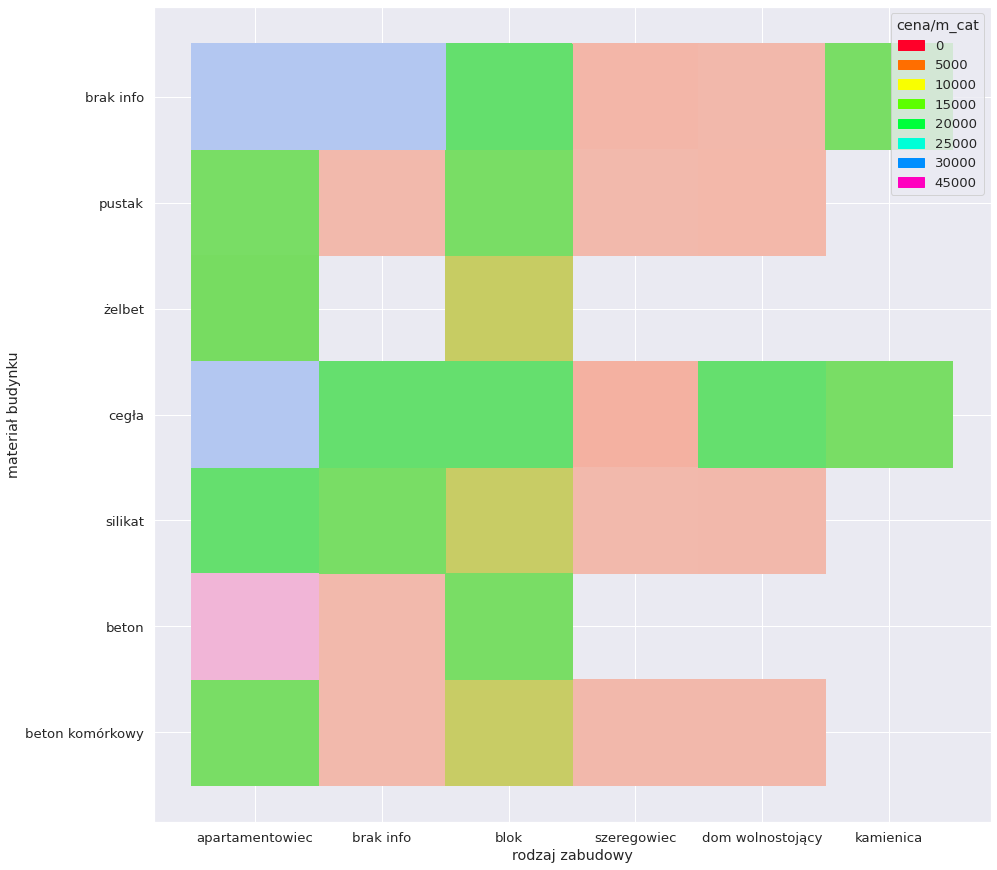

In [441]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='pierwotny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

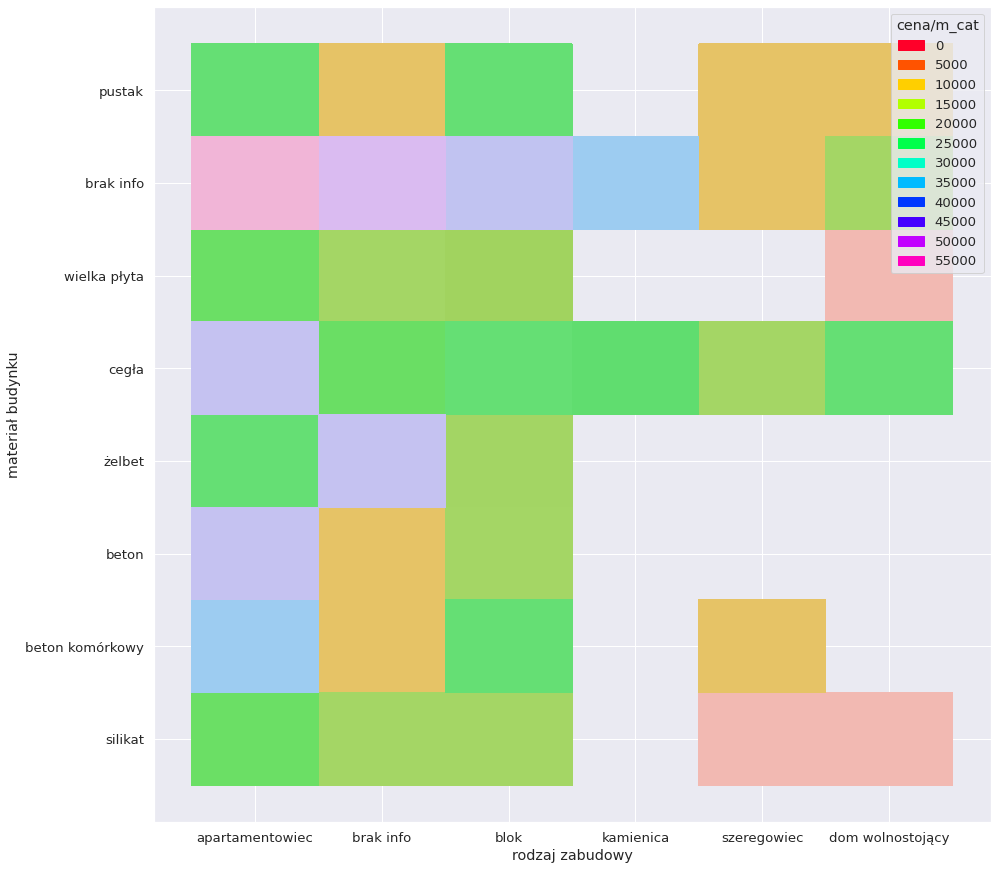

In [442]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='wtórny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

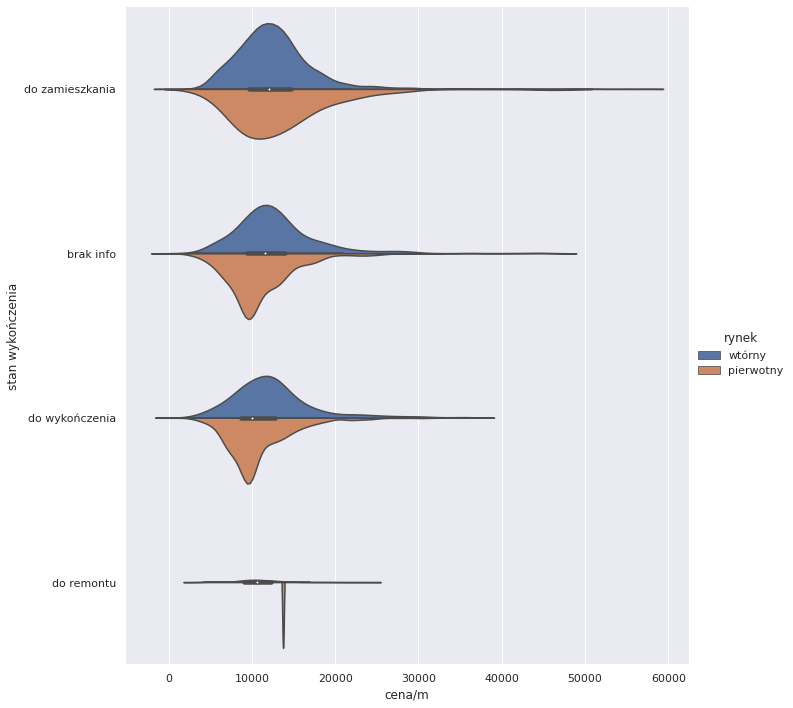

In [447]:
ax=sns.catplot(y="stanWykonczenia", x="cena/m", kind="violin", data=final_plots[final_plots['stanWykonczenia']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='stan wykończenia', xlabel='cena/m')
plt.show()

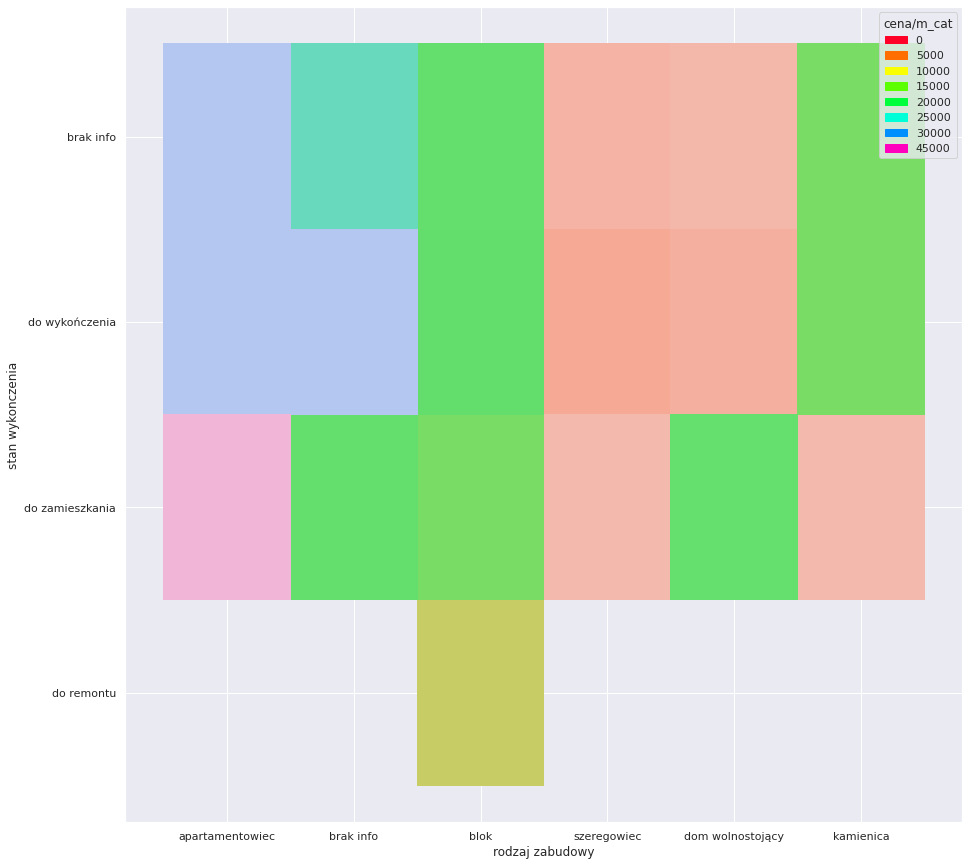

In [448]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='stanWykonczenia',x="rodzajZabudowy",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='pierwotny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='stan wykonczenia', xlabel='rodzaj zabudowy')
plt.show() 

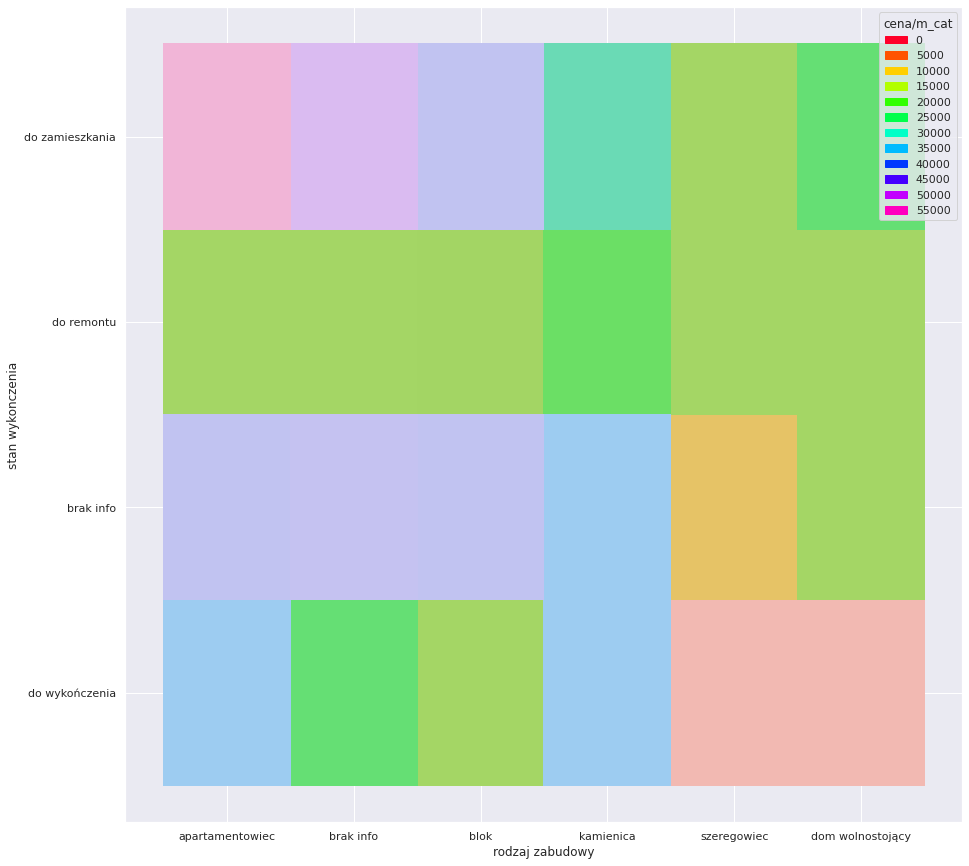

In [449]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='stanWykonczenia',x="rodzajZabudowy",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='wtórny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='stan wykonczenia', xlabel='rodzaj zabudowy')
plt.show() 

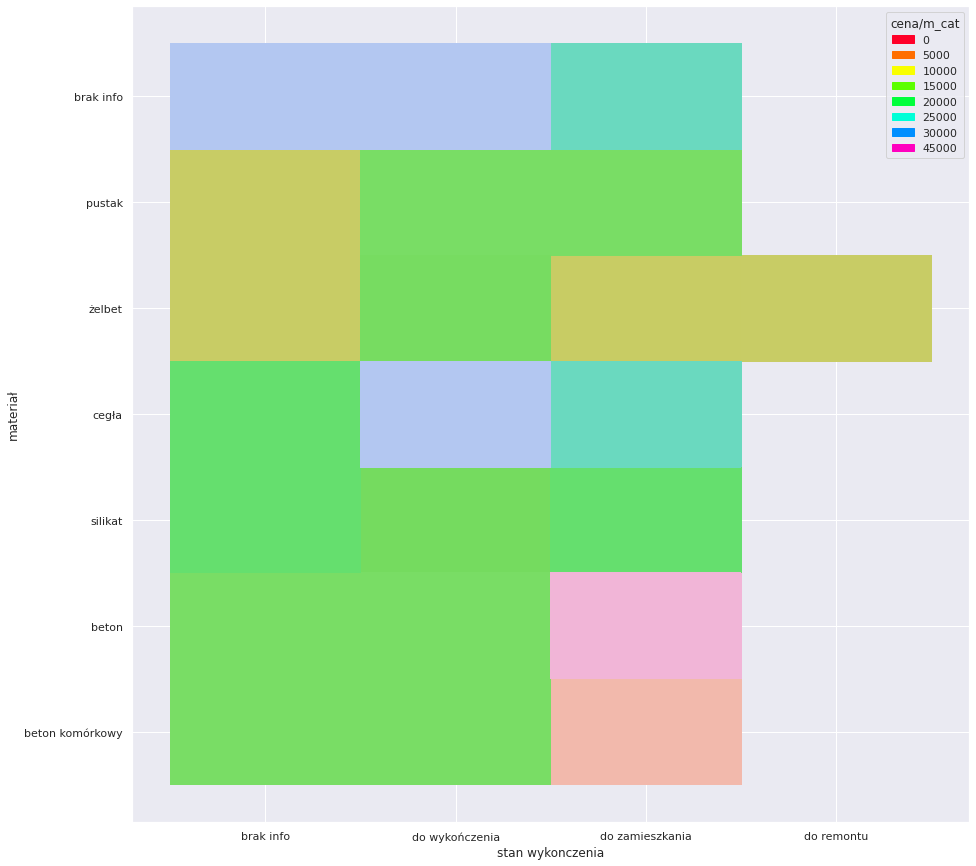

In [452]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="stanWykonczenia",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='pierwotny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał', xlabel='stan wykonczenia')
plt.show() 

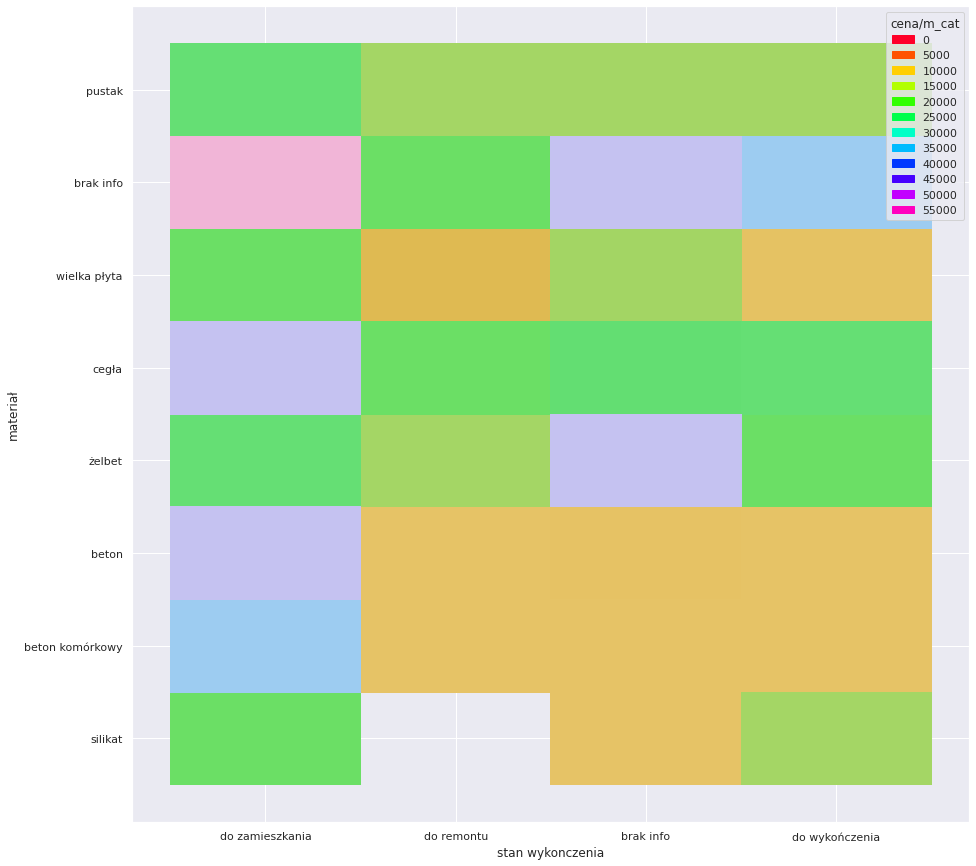

In [453]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="stanWykonczenia",
                data=final_plots[(final_plots['rodzajZabudowy']!='0') &(final_plots['materialBudynku']!='inne') &(final_plots['materialBudynku']!='0')&
                                 (final_plots['rynek']=='wtórny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał', xlabel='stan wykonczenia')
plt.show() 